In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Calculating the Mars year to the Earth year to input into the MCD in order to ultimately grab code directly from the site between the wanted solar longtiudes between MY34 and MY35. 

Firstly tried to use the datetime and timedelta modules to calculate this using reference values of the start and end dates of the martian years MY34 and 35 to return the earth date using calculations. This did not end up working when comparing it to the MCD dates.

In [2]:
from datetime import datetime, timedelta
import numpy as np

def Mars_to_Earth_date(mars_year,solar_longitude):
    ### takes the Martian year and solar longitude as parameters and returns the Earth day in Year, month, day as well as the Julian calendar date
    reference_dates ={
        34: {0: datetime(2017,5,5), 360: datetime(2019, 3, 23)},
        35: {0: datetime(2019,3,23), 360: datetime(2021, 2, 7)}
    }
    
    if mars_year not in reference_dates:
        raise ValueError("Input date not valid, please enter a date between the start of MY34 and end of MY35")
        
    start_date = reference_dates[mars_year][0]
    end_date = reference_dates[mars_year][360]
    
    #total days in the Martian year in earth days
    martian_year_length = (end_date - start_date).days
    
    #Linearly interpolate the Earth date from solar longitude
    earth_date = start_date + timedelta(days=((solar_longitude) / (360)) * martian_year_length)
    
    return earth_date

mars_year=34
solar_longitude=163
earth_date = Mars_to_Earth_date(34, 163)
print(earth_date)

2018-03-12 01:24:00


After this clearly wasnt working i re-evaluted the MCD and thought the solar longitude was calulated differently, but changing earth date to Julian date (number), so used the start and end times of the martian year previously in th eMCD to find the corresponding julian dates. I then found the first julian date corresponding to January 1st 4713 ( start date of julian calendar) with a similar method to before, but now attempting to use the fraction of the year with the julian dates to calulate the solar longitude

In [1]:
from datetime import datetime

# Earth Julian Dates (EJD) for MY34 and MY35, from inputing dates from previous code to get the julian calendar dates
EJD_VALUES = {
    34: {0: 2457879.25, 360: 2458566.25},  # EJD for MY34 at solar longitude 0 and 360
    35: {0: 2458566.25, 360: 2459253.25}   # EJD for MY35 at solar longitude 0 and 360
}

def earth_date_to_ejd(earth_date):
    """Convert Earth Date to Earth Julian Date (EJD)"""
    # Julian Date, beginning of julian cal.
    JD_EPOCH = 1721425.5
    
    # Calculate days since the start date
    delta_days = (earth_date - datetime(1, 1, 1)).days
    ejd = JD_EPOCH + delta_days
    
    return ejd

def ejd_to_solar_longitude(mars_year, ejd):
    if mars_year not in EJD_VALUES:
        raise ValueError("Mars year not in EJD values: enter between MY34 and MY35")

    ejd_start = EJD_VALUES[mars_year][0]
    ejd_end = EJD_VALUES[mars_year][360]
    
    fraction_of_year = (ejd - ejd_start) / (ejd_end - ejd_start)
    
    # solar longitude calulation to degrees
    solar_longitude = fraction_of_year * 360.0
    
    return solar_longitude

def Earth_to_Mars_solar_longitude(earth_date, mars_year):
    ejd = earth_date_to_ejd(earth_date)
    
    # Mars solar longitude corresponding to EJD
    solar_longitude = ejd_to_solar_longitude(mars_year, ejd)
    
    return solar_longitude

earth_date = datetime(2019, 2, 4)  
mars_year = 34  
solar_longitude = Earth_to_Mars_solar_longitude(earth_date, mars_year)
print(mars_year, solar_longitude) #gave wrong date soalr long in the MCD


34 334.9781659388646


At this point the earth dates i was being given were still not matching with the MCD, so i decided to inspect the page, check the source code and found the martian time code, copy and pasted into the following cell. I'm glad i did this as they had many things i would not have discovered on my own to mathc my code with the MCD date grabbing.

I found by inspecting the code how the earth date is converted. I will be uploading a screenshot of this to my lab notebook and have converted the javascript to python in the next cells. I do not claim this work as my own, as i used ChatGPT to change the javascript into python. After assessing this and experimenting with the MCD I found that the ls values are the only ones necessary, not the specific Earth date, as the plots created only depend on the solar longitude for the model.

In [17]:
import math
from datetime import datetime #for date and time handling

# function DefaultDateValues(){

# var rightnow= new Date();

# //document.calendar.year.value=2000;
# document.calendar.year.value=rightnow.getFullYear();
# //document.calendar.month.value=1;
# document.calendar.month.value=rightnow.getMonth()+1;
# //document.calendar.day.value=1;
# document.calendar.day.value=rightnow.getDate();
# }

def default_date_values():
    rightnow = datetime.now()
    return rightnow.year, rightnow.month, rightnow.day

#current_date_year,current_date_month, current_date_day = default_date_values()
#print(f"Current date is: {current_date_year}, {current_date_month}, {current_date_day}")

# function DefaultTimeValues(){

# var rightnow= new Date();

# document.calendar.hours.value=rightnow.getUTCHours();
# //document.calendar.hours.value=0;
# document.calendar.minutes.value=rightnow.getUTCMinutes();
# //document.calendar.minutes.value=0;
# document.calendar.seconds.value=rightnow.getUTCSeconds();
# //document.calendar.seconds.value=0;
# }

def default_time_values():
    rightnow = datetime.utcnow()
    return rightnow.hour, rightnow.minute, rightnow.second

#current_time_hour, current_time_minute, current_time_second = default_time_values()
#print(f"Current time is: {current_time_hour}:{current_time_minute}:{current_time_second}")

# function DateValues(y,m,d){
# var y;
# var m;
# var d;
# document.calendar.year.value=y;
# document.calendar.month.value=m;
# document.calendar.day.value=d;
# }

def date_values(y, m, d): #the earth day input
    return y, m, d

# function TimeValues(h,m,s){
# var h;
# var m;
# var s;
# document.calendar.hours.value=h;
# document.calendar.minutes.value=m;
# document.calendar.seconds.value=s;
# }

def time_values(h, m, s): #the time input, will probably leave at 00:00:00
    return h, m, s

# function DateAndTimeValues(year,month,day,hours,minutes,seconds){
# var year,month,day,hours,minutes,seconds;
# DateValues(year,month,day);
# TimeValues(hours,minutes,seconds);
# }

def date_and_time_values(year, month, day, hours, minutes, seconds):
    return date_values(year, month, day), time_values(hours, minutes, seconds)

# function CheckGivenYear(){
# var bissextil; // bissextil year ? (0==no, 1==yes) (returned value)
# var val=document.calendar.year.value;

# while ((val!=Math.round(val))||(val<1800)||(val>=2200)) {
#   val=prompt("Year must be an integer between 1800 and 2200\n (domain of validity of julian date computations in the MCD)",Math.round(val));
# }

# document.calendar.year.value=val;

# // check if it is a bissextil year
# /* a year is bissextil if it is a multiple of 4 but not of 100,
# or if it is a multiple of 400 */
# if ((((val%4)==0)&&((val%100)!=0))||((val%400)==0)) {
#   bissextil=1;
# }
# else {
#   bissextil=0; // not a bissextil year
# }

# return bissextil;
# }

def check_given_year(year): 
    '''Checking if the input year is in the correct range, and if it is a bisextile year'''
    while not (1800 <= year < 2200):
        year = int(input(f"Year must be an integer between 1800 and 2200: (domain of validity of julian date computations in the MCD)"))
    
    is_leap = (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)
    return is_leap

# function CheckGivenMonth(){
# var val=document.calendar.month.value;

# while((val<=0)||(val>12)||(val!=Math.round(val))) {
#  val=prompt("Month must be an integer between 1 and 12!",Math.round(val));
# }

# document.calendar.month.value=val;
# }

def check_given_month(month):
    '''Checking if the input month is in the correct range'''
    while not (1 <= month <= 12):
        month = int(input("Month must be an integer between 1 and 12: "))
    return month

# function CheckGivenDay(year,bissextil,month){
# var year;
# var bissextil; // bissextil year ? (0==no, 1==yes)
# var month;
# var dayval;

# dayval=document.calendar.day.value;

# if (month==1) {
#   while (((dayval<=0)||(dayval>31))||(dayval!=Math.round(dayval))){
#     dayval=prompt("Invalid day! (must be an integer ranging from 1 to 31)",dayval);
#   }
# }
# if (month==2) {
#   if (bissextil==0){
#     while (((dayval<=0)||(dayval>28))||(dayval!=Math.round(dayval))){
#       dayval=prompt("Invalid day! (must be an integer ranging from 1 to 28)",dayval);
#     }
#   }
#   else {
#     while (((dayval<=0)||(dayval>29))||(dayval!=Math.round(dayval))){
#       dayval=prompt("Invalid day! (must be an integer ranging from 1 to 29)",dayval);
#     }
#   }
# }
# if (month==3) {
#   while (((dayval<=0)||(dayval>31))||(dayval!=Math.round(dayval))){
#     dayval=prompt("Invalid day! (must be an integer ranging from 1 to 31)",dayval);
#   }
# }
# if (month==4) {
#   while (((dayval<=0)||(dayval>30))||(dayval!=Math.round(dayval))){
#     dayval=prompt("Invalid day! (must be an integer ranging from 1 to 30)",dayval);
#   }
# }
# if (month==5) {
#   while (((dayval<=0)||(dayval>31))||(dayval!=Math.round(dayval))){
#     dayval=prompt("Invalid day! (must be an integer ranging from 1 to 31)",dayval);
#   }
# }
# if (month==6) {
#   while (((dayval<=0)||(dayval>30))||(dayval!=Math.round(dayval))){
#     dayval=prompt("Invalid day! (must be an integer ranging from 1 to 30)",dayval);
#   }
# }
# if (month==7) {
#   while (((dayval<=0)||(dayval>31))||(dayval!=Math.round(dayval))){
#     dayval=prompt("Invalid day! (must be an integer ranging from 1 to 31)",dayval);
#   }
# }
# if (month==8) {
#   while (((dayval<=0)||(dayval>31))||(dayval!=Math.round(dayval))){
#     dayval=prompt("Invalid day! (must be an integer ranging from 1 to 31)",dayval);
#   }
# }
# if (month==9) {
#   while (((dayval<=0)||(dayval>30))||(dayval!=Math.round(dayval))){
#     dayval=prompt("Invalid day! (must be an integer ranging from 1 to 30)",dayval);
#   }
# }
# if (month==10) {
#   while (((dayval<=0)||(dayval>31))||(dayval!=Math.round(dayval))){
#     dayval=prompt("Invalid day! (must be an integer ranging from 1 to 31)",dayval);
#   }
# }
# if (month==11) {
#   while (((dayval<=0)||(dayval>30))||(dayval!=Math.round(dayval))){
#     dayval=prompt("Invalid day! (must be an integer ranging from 1 to 30)",dayval);
#   }
# }
# if (month==12) {
#   while (((dayval<=0)||(dayval>31))||(dayval!=Math.round(dayval))){
#     dayval=prompt("Invalid day! (must be an integer ranging from 1 to 31)",dayval);
#   }
# }


# document.calendar.day.value=dayval;
# }

def check_given_day(year, leap_year, month, day):
    '''Checking if the input day is in the correct range for each month'''
    day_val = day
    if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
        while not (1 <= day_val <= 31):
            day_val = int(input("Invalid day! (must be between 1 and 31): "))
    elif month == 2:
        if leap_year:
            while not (1 <= day_val <= 29):
                day_val = int(input("Invalid day! (must be between 1 and 29): "))
        else:
            while not (1 <= day_val <= 28):
                day_val = int(input("Invalid day! (must be between 1 and 28): "))
    else:
        while not (1 <= day_val <= 30):
            day_val = int(input("Invalid day! (must be between 1 and 30): "))
    return day_val

# function CheckGivenTime(){
# var hours;
# var minutes;
# var seconds;

# // Check value of hours
# hours=document.calendar.hours.value;
# while (((hours<0)||(hours>=24))||(hours!=Math.round(hours))) {
#   hours=prompt("Invalid Time (hh) value! (must be an integer ranging from 0 to 23)",hours);
#   document.calendar.hours.value=hours;
# }

# // Check value of minutes
# minutes=document.calendar.minutes.value;
# while (((minutes<0)||(hours>=60))||(minutes!=Math.round(minutes))) {
#   minutes=prompt("Invalid Time (mm) value! (must be an integer ranging from 0 to 59)",minutes);
#   document.calendar.minutes.value=minutes;
# }

# //Check value of seconds
# seconds=document.calendar.seconds.value;
# while((seconds<0)||(seconds>=60)) {
#   seconds=prompt("Invalid Time (ss) value! (must range from 0 to 60)",seconds);
#   document.calendar.seconds.value=seconds;
# }

# }

def check_given_time(hours, minutes, seconds):
    '''Checking if the input time is in the correct range'''
    while not (0 <= hours < 24):
        hours = int(input("Invalid Time (hh) value! (must be between 0 and 23): "))
    
    while not (0 <= minutes < 60):
        minutes = int(input("Invalid Time (mm) value! (must be between 0 and 59): "))
    
    while not (0 <= seconds < 60):
        seconds = int(input("Invalid Time (ss) value! (must be between 0 and 60): "))
    
    return hours, minutes, seconds

# function CheckGivenDate(){
# var bissextil; // bissextil year ? (0==no, 1==yes)

# bissextil=CheckGivenYear();
# CheckGivenMonth();
# CheckGivenDay(document.calendar.year.value,bissextil,document.calendar.month.value);
# CheckGivenTime();
# //alert("OK");
# return bissextil;
# }

def check_given_date(year, month, day):
    leap_year = check_given_year(year)
    month = check_given_month(month)
    day = check_given_day(year, leap_year, month, day)
    hours, minutes, seconds = check_given_time(0, 0, 0)
    return leap_year, month, day, hours, minutes, seconds

def convert2julian(year, month, day, hours, minutes, seconds):
    ref_year = 1968
    ref_jdate = 2.4398565e6  # Julian date for 01/01/1968 00:00:00
    edays = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334] #cumulative days of the year for each month
    
    nday = 0.0  # number of days preset to zero
    
    # Compute number of days due to years
    if year > ref_year:
        for i in range(ref_year, year):
            nday += 365.0
            if (i % 4 == 0 and i % 100 != 0) or (i % 400 == 0):
                nday += 1
    else:
        for i in range(year, ref_year):
            nday -= 365.0
            if (i % 4 == 0 and i % 100 != 0) or (i % 400 == 0):
                nday -= 1
    
    # Add number of days due to elapsed months
    nday += edays[month - 1]
    
    # Add 1 if year is leap and month >= 3
    if leap_year and month >= 3:
        nday += 1
    
    # Adding the reference year offset and day
    jdate = nday + day + ref_jdate - 1.0
    
    # Add time (hours + minutes + seconds)
    jdate += hours / 24.0 + minutes / 1440.0 + seconds / 86400.0
    
    return jdate

def convert2ls(jdate):
    jdate_ref = 2.442765667e6  # 19/12/1975 4:00:00, such that Ls=0
    martianyear_ref = 12
    earthday = 86400.0
    marsday = 88775.245
    marsyear = 668.60  # Number of sols in a Martian year

    sol = (jdate - jdate_ref) * earthday / marsday
    
    martianyear = martianyear_ref
    while sol >= marsyear:
        sol -= marsyear
        martianyear += 1
    
    while sol < 0.0:
        sol += marsyear
        martianyear -= 1
    
    ls = sol_to_ls(sol)
    
    return martianyear, round(ls, 1), round(sol, 1)

def sol_to_ls(sol):
    year_day = 668.6 #mars year length to earth days (equal to 1 sol)
    peri_day = 485.35 #day of perihelion
    e_ellip = 0.09340 #orbital eccentricity
    timeperi = 1.90258341759902  # Ls at perihelion = 250.99
    rad2deg = 180. / math.pi
    
    zz = (sol - peri_day) / year_day
    zanom = 2. * math.pi * (zz - round(zz))
    
    # Solve Kepler equation
    zx0 = zanom + e_ellip * math.sin(zanom)
    while True:
        zdx = -(zx0 - e_ellip * math.sin(zx0) - zanom) / (1. - e_ellip * math.cos(zx0))
        zx0 += zdx
        if abs(zdx) < 1.e-7:
            break
    
    if zanom < 0:
        zx0 = -zx0
    
    zteta = 2. * math.atan(math.sqrt((1. + e_ellip) / (1. - e_ellip)) * math.tan(zx0 / 2.))
    #zteta is the true anomaly: the angle between mars position currently and at perihelion, from the sun.
    ls = zteta - timeperi
    if ls < 0:
        ls += 2. * math.pi
    if ls > 2. * math.pi:
        ls -= 2. * math.pi
    
    ls = rad2deg * ls
    return ls

# def numerical_method_zz_zanom():
#     """purpose of this function is, through numerical method, to define zz values based on the sol input to use in the reversal of the sol_to_ls function."""
#     year_day = 668.6
#     peri_day = 485.35
#     sol_test_values = range(0, int(year_day) *2, 1)
    
#     sol_zz_dict = {}
#     sol_zanom_dict = {}
#     ls_zz_dict = {}
    
#     for sol in sol_test_values:
#         zz = (sol-peri_day) /year_day
#         sol_zz_dict[f"{sol}"] = zz
#         zanom = 2* math.pi * (zz - round(zz))
#         sol_zanom_dict[f"{sol}"] = zanom
#         ls = sol_to_ls(sol)
#         ls_zz_dict[f"{ls}":] = zz    
    
#     return sol_zz_dict, sol_zanom_dict, ls_zz_dict

# sol_zz_dict, sol_zanom_dict, ls_zz_dict = numerical_method_zz_zanom()
# print(sol_zz_dict)

def correct_value(longitude, latitude):
    if longitude == "all":
        longitude = 0.0
    if latitude == "all":
        latitude = 0.0
    return longitude, latitude

year, month, day = default_date_values()
hours, minutes, seconds = default_time_values()

leap_year, month, day, hours, minutes, seconds = check_given_date(2000, 1, 1)
jdate = convert2julian(2000, 1, 1, 18, 0, 0)
martianyear, ls, sol = convert2ls(jdate)

print(f"Martian Year: {martianyear}, Ls: {ls}, Sol: {sol}")


Martian Year: 24, Ls: 274.4, Sol: 521.5


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

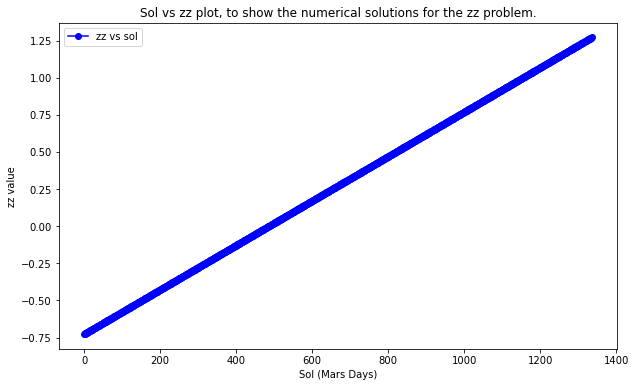

In [3]:
import matplotlib.pyplot as plt

def numerical_method_zz_zanom():
    """purpose of this function is, through numerical method, to define zz values based on the sol input to use in the reversal of the sol_to_ls function."""
    year_day = 668.6
    peri_day = 485.35
    sol_test_values = range(0, int(year_day) *2, 1)
    sol_zz_dict = {}
    sol_zanom_dict = {}
    for sol in sol_test_values:
        zz = (sol-peri_day) /year_day
        sol_zz_dict[f"{sol}"] = zz
        zanom = 2* math.pi * (zz - round(zz))
        sol_zanom_dict[f"{sol}"] = zanom
    
    return sol_zz_dict, sol_zanom_dict

sol_zz_dict, sol_zanom_dict = numerical_method_zz_zanom()

def sol_vs_zz_plot(dictionary):
    
    sol_values = list(sol_zz_dict.keys())
    zz_values = list(sol_zz_dict.values())
    
    sol_values = [int(sol) for sol in sol_values]
    print(sol_values)

    plt.figure(figsize = (10,6))
    plt.plot(sol_values, zz_values, marker="o", linestyle="-", color="blue",label="zz vs sol")

    plt.xlabel("Sol (Mars Days)")
    plt.ylabel("zz value")
    plt.title("Sol vs zz plot, to show the numerical solutions for the zz problem.")
    plt.legend()
    
    plt.show()
    
sol_vs_zz_plot(sol_zz_dict)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

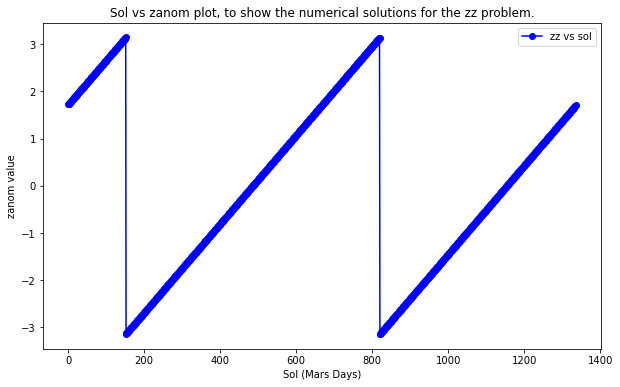

In [4]:
def sol_vs_zanom_plot(sol_zanom_dict):
    
    sol_values_2 = list(sol_zanom_dict.keys())
    zanom_values = list(sol_zanom_dict.values())
    
    zanom_values = [float(zanom) for zanom in zanom_values]
    sol_values_2 = [int(sol) for sol in sol_values_2]
    print(sol_values_2)
    print(zanom_values)
    
    plt.figure(figsize=(10,6))
    plt.plot(sol_values_2, zanom_values, marker="o", linestyle="-", color="blue",label="zz vs sol")

    plt.xlabel("Sol (Mars Days)")
    plt.ylabel("zanom value")
    plt.title("Sol vs zanom plot, to show the numerical solutions for the zz problem.")
    plt.legend()
    
    plt.show()   

sol_vs_zanom_plot(sol_zanom_dict)

# Reversing the code so Earth date can be calculated using Mars date, so this can be input into links to gather the data for the correct times matching the NOMAD data.

In [15]:
import math
from datetime import datetime, timedelta
import numpy as np

#can reverse the keplerian equation:
def numerical_method_zz_zanom():
    """purpose of this function is, through numerical method, to define zz values based on the sol input to use in the reversal of the sol_to_ls function."""
    year_day = 668.6
    peri_day = 485.35
    sol_test_values = np.arange(0, int(year_day) *2, 0.1)
    
    sol_zz_dict = {}
    sol_zanom_dict = {}
    ls_zz_dict = {}
    
    for sol in sol_test_values:
        zz = (sol-peri_day) /year_day
        sol_zz_dict[f"{sol}"] = zz
        zz = float(zz)
        zanom = float(2* math.pi * (zz - round(zz)))
        sol_zanom_dict[f"{sol}"] = zanom
        ls = sol_to_ls(sol)
        ls_zz_dict[f"{ls}"] = zz
    
    return sol_zz_dict, sol_zanom_dict, ls_zz_dict
    
def find_zz_from_sol():
    zz = sol_zz_dict.values()
    return zz

def match_zz_for_ls(ls):
    sol_zz_dict, sol_zanom_dict, ls_zz_dict = numerical_method_zz_zanom()
    for ls in ls_zz_dict:
        if int(ls) == ls_zz_dict.keys():
            zz_value_for_ls = ls_zz_dict.get(ls)

   # matched_sol_to_ls = {k1: k2 for k1, v1 in sol_zz_dict for k2, v2 in ls_zz_dict if v1==v2}
    return zz_value_for_ls

MATCHED_zz = match_zz_for_ls(ls)
print(match_zz_for_ls)


    #testing sol values every 10 days up to 2 martian years
def ls_to_sol(ls):
    year_day = 668.6
    peri_day = 485.35
    e_ellip = 0.09340
    timeperi = 1.90258341759902  # Ls at perihelion = 250.99
    deg2rad = math.pi / 180.0
    
    ls_rad = ls * deg2rad
    if ls_rad < 0:
        ls_rad += 2* math.pi
    if ls_rad > (2*math.pi):
        lsrad -= (2*math.pi)
        
    zteta = ls_rad + timeperi
    #calculating true anomaly^
    
    
#     if zteta < 0:
#         zteta += 2.0 *math.pi 
#     if zteta > 2.0 *math.pi: #changing range to 0 to 2pi radians
#         zteta -= 2.0 * math.pi
    
    #solving kepler's equation, backwards.
    #zx0 = 2.0 * math.atan(math.sqrt((1.0 - e_ellip) / (1.0 + e_ellip)) * math.tan(zteta / 2.0))
    #if ls>180.0:
     #   zx0 = -zx0
    zx0 = math.atan(math.tan(zteta/2) / (math.sqrt(((1. + e_ellip) / (1. - e_ellip))))) * 2
    
   # zanom = float(2. * math.pi * (zz - round(zz)))


    
    zz = (sol - peri_day) / year_day
    sol = (zz * year_day) + peri_day
    
    
    #zanom = zx0 - e_ellip *math.sin(zx0)
    0
    #through numerical method:
    
    
    return sol

test_sol = ls_to_sol(322)
print(test_sol)


ValueError: invalid literal for int() with base 10: '6.293556149881151e-05'

In [ ]:
import math
import numpy as np
#need sol_zz
#need ls_zz
#map them to eachotehr
def numerical_method_zz_ls():
    """purpose of this function is, through numerical method, to define zz values based on the sol input to use in the reversal of the sol_to_ls function."""
    year_day = 668.6
    peri_day = 485.35
    sol_test_values = np.arange(0, int(year_day) *2, 0.1)
    
    sol_zz_dict = {}
    sol_zanom_dict = {}
    ls_zz_dict = {}
    
    for sol in sol_test_values:
        zz = (sol-peri_day) /year_day
        sol_zz_dict[f"{sol}"] = zz
        zz = float(zz)
        zanom = float(2* math.pi * (zz - round(zz)))
        sol_zanom_dict[f"{sol}"] = zanom
        
        ls = sol_to_ls(sol)
        print(ls)
        ls_zz_dict[f"{ls}"] = zz    
    
    return sol_zz_dict, sol_zanom_dict, ls_zz_dict

sol_zz_dict, sol_zanom_dict, ls_zz_dict = numerical_method_zz_ls()
print(ls_zz_dict)

In [ ]:
def convert2julian_from_mars(martian_year, ls):
    jdate_ref = 2.442765667e6  # 19/12/1975 4:00:00, such that Ls=0
    martianyear_ref = 12
    earthday = 86400.0
    marsday = 88775.245
    marsyear = 668.60  # Number of sols in a Martian yearjdate_ref = 2.442765667e6 # Ref julian date Ls= 0 on 1975/12/19
    
    sol = ls_to_sol(ls)
    
    year_offset = martian_year - martianyear_ref
    total_sol = sol + (year_offset * marsyear)
    #adjusting sol based on MY difference
    #sol += year_offset * marsyear 
    
    jdate = jdate_ref + (total_sol * marsday /earthday)
    
    return jdate

In [ ]:
def convert2earthdate(jdate):
    ref_year = 1968
    ref_jdate = 2.4398565e6  # Julian date for 01/01/1968 00:00:00
    edays = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334] #cumulative days of the year for each month
    
    #total_days = jdate - ref_jdate + 1.0
    #day_exact = total_days : gave 1.75 due to hours not being separate from days.
    total_days = jdate - ref_jdate + 1.0
    whole_days = math.floor(total_days)
    frac_day = total_days - whole_days
    
    hours_exact = frac_day * 24.0
    minutes_exact = (hours_exact - math.floor(hours_exact)) * 60.0
    seconds_exact = (minutes_exact - math.floor(minutes_exact)) *60.0
    
    #year eaxct days:
    year = ref_year
    while whole_days >= 365.0:
        is_leap = (year % 4==0 and year % 100 != 0) or (year % 400 == 0)
        days_in_year =366 if is_leap else 365.0
        if whole_days >= days_in_year:
            whole_days -= days_in_year
            year += 1
        else:
            break
    
    #month and day:
    is_leap = (year % 4==0 and year % 100 != 0) or (year % 400 == 0)
    month_days = edays[:]
    if is_leap:
        for m in range(2, 12):
            month_days[m] += 1 #adjusting for leap year
    
    month = 1 
    while month < 12 and whole_days > month_days[month]:
        month += 1
        
    day_exact = whole_days - month_days[month - 1]
    
    return year, month, day_exact, hours_exact, minutes_exact, seconds_exact
#testing it works correctly:
jdate = convert2julian(2000, 1, 1, 18, 0, 0)
print(jdate)
print(convert2earthdate(jdate))

In [ ]:
def MartianDate_to_EarthDate(martian_year, ls):
    sol = ls_to_sol(ls)
    jdate = convert2julian_from_mars(martian_year, ls)
    earthdate = convert2earthdate(jdate)
    return earthdate

martian_year = 24
ls = 274.4
earthdate = MartianDate_to_EarthDate(martian_year, ls)
#print(f"Martian date: MY{martian_year}, ls{ls}: Earth date: {year}/{month}/{day_exact}, Earth time: {hours_exact}:{minutes_exact}:{seconds_exact}")
print(f"marsdate: {martian_year}, {ls}. Earthdate: {earthdate}")